# What factors made people more likely to survive?


#### 1.Which class was the largest one on Titanic? Is there any relationship between passenger class and survival?
#### 2.Which age group was the largest one on Titanic? Which age group had the highest survival rate? Is there any relationship between age and survival?
#### 3.Were there more female passengers or more male passengers? Is gender a factor that affects getting a lifeboat?
#### 4.Were those who came with their families more likely to survive than those who went aboard the ship alone? Is having families accompanied a factor that influences survival rate?
              

## Load and examine data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('C:\\Users\\smasung\\Desktop\\stu\\work\\project-two-titanic\\titanic-data.csv')
titanic_df.info()# Check whether there are misssing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that 177 rows of the "Age" column do not have data and only 204 rows of the "Cabin" column are filled in. 
Since this report concerns age, but does not investigate the effect of cabin, I will only work with the missing data of "Age" column.
I'll fill in the missing data with random values that are one std above and below the mean as 95% of data are in this region. By doing this, I can improve the data's credibility. 

In [2]:
pd.options.mode.chained_assignment = None
titanic_age_average = titanic_df['Age'].mean()
titanic_age_std = titanic_df['Age'].std()
titanic_age_nan = titanic_df['Age'].isnull().sum()

rand_1=np.random.randint(titanic_age_average-titanic_age_std,titanic_age_average+titanic_age_std,size=titanic_age_nan)
#Fill in the missing values with the random values that are one std above and below the mean of Age column.

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
#Convert them to int
titanic_df['Age']=titanic_df['Age'].astype(int)

titanic_age = titanic_df[['Age','Survived']]
titanic_pclass = titanic_df[['Pclass','Survived']]
titanic_gender = titanic_df[['Sex','Survived']]
titanic_family = titanic_df[['SibSp','Parch','Survived']]
#Extract data

titanic_age['Status'] = pd.cut(titanic_age['Age'],bins=[0,18,65,100],labels=["children","adults","elderly people"])
del titanic_age['Age']


## Exploring data

### Custom function

In [3]:
#Analyze and visualize data of each category
def subcate_and_visualize(titanic_df,field_name):
    %pylab inline
    num = titanic_df[field_name].nunique() 
    titanic_df_elements = titanic_df[field_name].unique()
    
    print ("There are {} groups in this category:").format(num)
    print ("They are:") 
    print titanic_df_elements 
    print ("The following graph show the general information about this category: ")
    titanic_df.groupby([field_name]).count().plot.pie(subplots=True,autopct='%1.1f%%')
    
    print ("The following graph shows the mean of the number of people(survived) in different groups:")
    titanic_df_mean = titanic_df.groupby([field_name]).mean()
    titanic_df_mean.plot.barh()
    plt.xlabel(field_name)
    plt.ylabel("mean_survived")
    plt.show()
    
    #Investigate each group 
    def s_and_v(element):
        print{"The following graphs shows the constitution of different groups:"}
        subcate = titanic_df.loc[titanic_df[field_name]==element]
        subcate_sum = subcate['Survived'].count()
        subcate_survived = subcate['Survived'].sum() 
        subcate_dead = subcate_sum-subcate_survived
        print ('{}: Among {} people, {} people survived,{} people died').format(element,subcate_sum,subcate_survived,subcate_dead)

    for element in titanic_df_elements:
        s_and_v(element)

    titanic_df.groupby([field_name,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')    
        
    
        
    
    
        
        
    
    

### Titanic Casualty Figures

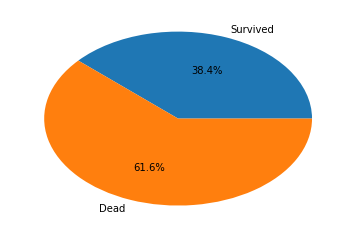

Among 891 people in Titanic，342 people survived,549 people died


In [4]:
titanic_sum = titanic_df['Survived'].count()
titanic_survive = titanic_df['Survived'].sum()
titanic_dead = titanic_sum-titanic_survive
s=pd.Series([titanic_survive,titanic_dead],index=['Survived','Dead'])

plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()
print ('Among {} people in Titanic，{} people survived,{} people died').format(titanic_sum,titanic_survive,titanic_dead)








### Passenger class

Populating the interactive namespace from numpy and matplotlib
There are 3 groups in this category:
They are:
[3 1 2]
The following graph show the general information about this category: 
The following graph shows the mean of the number of people(survived) in different groups:


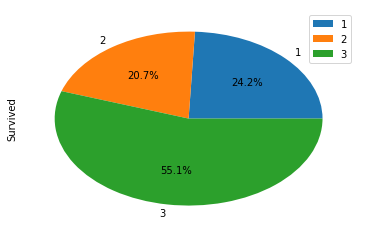

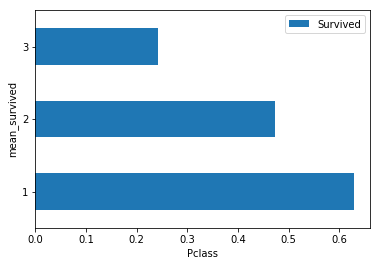

set(['The following graphs shows the constitution of different groups:'])
3: Among 491 people, 119 people survived,372 people died
set(['The following graphs shows the constitution of different groups:'])
1: Among 216 people, 136 people survived,80 people died
set(['The following graphs shows the constitution of different groups:'])
2: Among 184 people, 87 people survived,97 people died


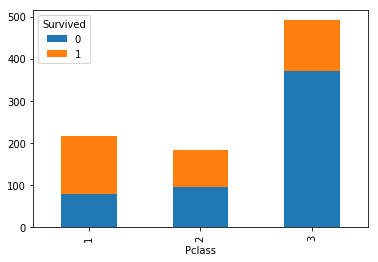

In [5]:
subcate_and_visualize(titanic_pclass,'Pclass')

### Age

Populating the interactive namespace from numpy and matplotlib
There are 3 groups in this category:
They are:
[adults, children, elderly people, NaN]
Categories (3, object): [children < adults < elderly people]
The following graph show the general information about this category: 
The following graph shows the mean of the number of people(survived) in different groups:


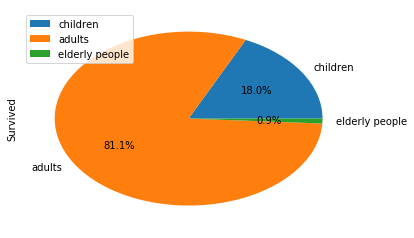

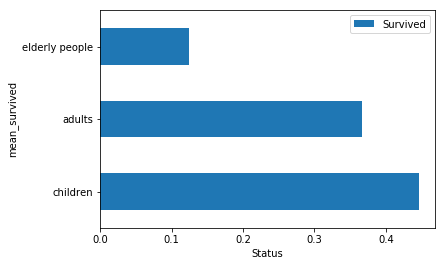

set(['The following graphs shows the constitution of different groups:'])
adults: Among 717 people, 263 people survived,454 people died
set(['The following graphs shows the constitution of different groups:'])
children: Among 159 people, 71 people survived,88 people died
set(['The following graphs shows the constitution of different groups:'])
elderly people: Among 8 people, 1 people survived,7 people died
set(['The following graphs shows the constitution of different groups:'])
nan: Among 0 people, 0 people survived,0 people died


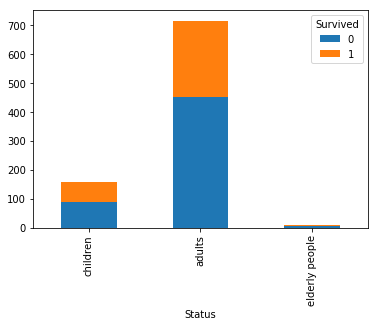

In [6]:
subcate_and_visualize(titanic_age,'Status')

### Sex

Populating the interactive namespace from numpy and matplotlib
There are 2 groups in this category:
They are:
['male' 'female']
The following graph show the general information about this category: 
The following graph shows the mean of the number of people(survived) in different groups:


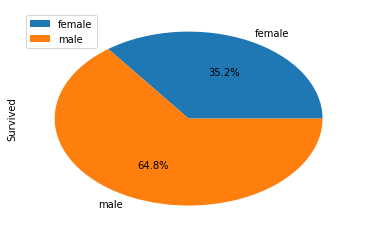

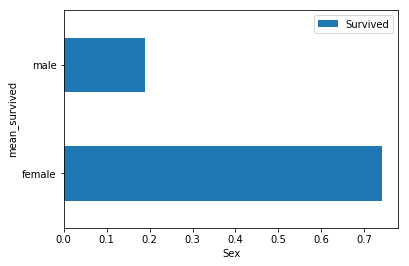

set(['The following graphs shows the constitution of different groups:'])
male: Among 577 people, 109 people survived,468 people died
set(['The following graphs shows the constitution of different groups:'])
female: Among 314 people, 233 people survived,81 people died


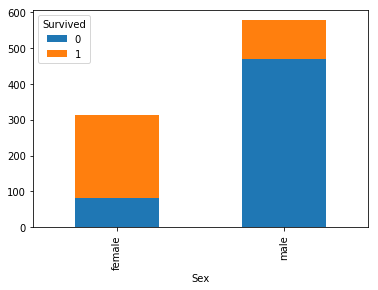

In [7]:
subcate_and_visualize(titanic_gender,'Sex')



    



### Family

In [8]:
#家庭
pd.options.mode.chained_assignment = None
titanic_family['Family'] = titanic_family['Parch'] + titanic_family['SibSp']
del titanic_family['Parch']
del titanic_family['SibSp']
def deter_family(value):
    if value==0:
        value='Single'
    else:
        value='with_family'
    return value
    
titanic_family['Status'] = (titanic_family['Family']).apply(deter_family)
del titanic_family['Family']



Populating the interactive namespace from numpy and matplotlib
There are 2 groups in this category:
They are:
['with_family' 'Single']
The following graph show the general information about this category: 
The following graph shows the mean of the number of people(survived) in different groups:


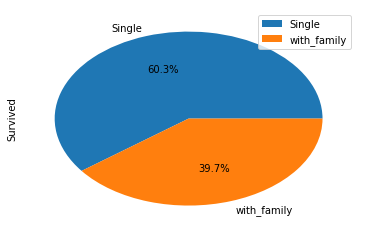

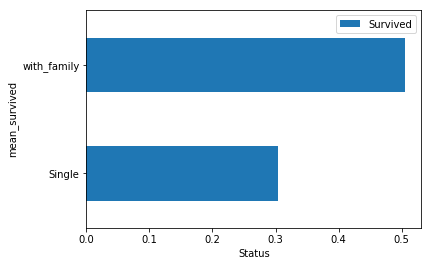

set(['The following graphs shows the constitution of different groups:'])
with_family: Among 354 people, 179 people survived,175 people died
set(['The following graphs shows the constitution of different groups:'])
Single: Among 537 people, 163 people survived,374 people died


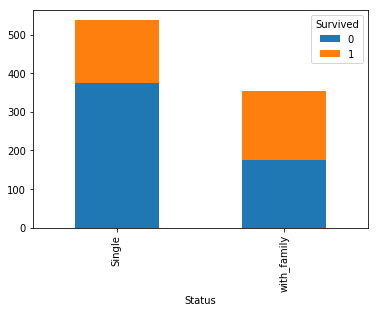

In [9]:
subcate_and_visualize(titanic_family,'Status')

## Conclusion

First of all, third-class passengers were the largest group on Titanic. However, they were less likely to survive than first-class passengers and second-class passengers. In fact, according to data, first-class passengers were thrid times as likely to survive as third-class passengers, while second-class passengers were twice. Thus we could conclude that class is associated with survival rate.

Secondly, there were more adults(18-65 years ole) than any age groups. But children(0-18 years old) had the highest survival rate. 44.4% of children, 36.7% of adults and only 12.5% of elderly people(over 65 years old) were saved. Obviously, age is a factor that influences survival rate.

Thirdly, on Titanic, there were far more men than women. Nonetheless, women had a 74.5% chance of survival while men only had 18.9%. The survival rate of women were three times more than that of men, meaning gender is also one of the factors related to survival rate.

Lastly, 39.7% of people came with their families while 60.3% of people went alone. Among those who went aboard with their families, about 50% of them survived, whereas only 30% of those who were alone made it. So having families accompanied is a factor that influences survival rate.

To sum up, class, age, gender and having families accompanied all influence survival rate. But they do not determine survival rate. And there are still other factors to be considered.


## Limitation

There are only 891 rows of data, some of them missing data in categories like age. Since the dataset does not include all of the data of Titanic passengers, the statistical figures are not accurate.

## Reference source:
https://www.kaggle.com/c/titanic/kernels?group=everyone&pageSize=20&language=Python&competitionId=3136&isMixedPrivacyLayout=true&startRow=0
